In [1]:
import string
import pandas as pd
import nltk
nltk.download('stopwords',quiet=True)
from nltk.corpus import stopwords
nltk.download('punkt',quiet=True)
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [2]:
#import data
df_train=pd.read_csv('twittertrain.csv')
df_test=pd.read_csv('twittertest.csv')
df_sample=pd.read_csv('sample_submission.csv')

In [3]:
df_test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
df_train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df_sample.head(5)

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [6]:
df_train['keyword']=df_train['keyword'].fillna('')

In [7]:
long_string=' '.join(df_train['keyword'])

In [8]:
#Preprocessing
df_train.head(5)

,id,keyword,location,text,target
0,1,,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,,NaN,All residents asked to 'shelter in place' are ...,1
3,6,,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
# Remove Punctuation
punc_list = list(string.punctuation)
def remove_punctuation(text, punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text

In [10]:
df_train2=df_train.copy()
df_train2['text']=df_train2['text'].apply(lambda x:remove_punctuation(x,punc_list))
display(df_train2.head(5))
df_test2=df_test.copy()
df_test2['text']=df_test2['text'].apply(lambda x:remove_punctuation(x,punc_list))
display(df_test2.head(5))

,id,keyword,location,text,target
0,1,,NaN,Our Deeds are the Reason of this earthquake M...,1
1,4,,NaN,Forest fire near La Ronge Sask Canada,1
2,5,,NaN,All residents asked to shelter in place are ...,1
3,6,,NaN,13 000 people receive wildfires evacuation or...,1
4,7,,NaN,Just got sent this photo from Ruby Alaska as ...,1


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,Heard about earthquake is different cities s...
2,3,NaN,NaN,there is a forest fire at spot pond geese are...
3,9,NaN,NaN,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
# Tokenize each text column
token_df_test = df_test.copy()
for column in df_test.columns:
    token_df_test[column] = df_test[column].apply(lambda s: word_tokenize(s) if type(s) == str else s)
display(token_df_test.head(5))

,id,keyword,location,text
0,0,NaN,NaN,"[Just, happened, a, terrible, car, crash]"
1,2,NaN,NaN,"[Heard, about, #, earthquake, is, different, c..."
2,3,NaN,NaN,"[there, is, a, forest, fire, at, spot, pond, ,..."
3,9,NaN,NaN,"[Apocalypse, lighting, ., #, Spokane, #, wildf..."
4,11,NaN,NaN,"[Typhoon, Soudelor, kills, 28, in, China, and,..."


In [12]:
# Tokenize each text column
token_df_train = df_train2.copy()
for column in df_train2.columns:
    token_df_train[column] = df_train2[column].apply(lambda s: word_tokenize(s) if type(s) == str else s)
display(token_df_train.head(5))

,id,keyword,location,text,target
0,1,[],NaN,"[Our, Deeds, are, the, Reason, of, this, earth...",1
1,4,[],NaN,"[Forest, fire, near, La, Ronge, Sask, Canada]",1
2,5,[],NaN,"[All, residents, asked, to, shelter, in, place...",1
3,6,[],NaN,"[13, 000, people, receive, wildfires, evacuati...",1
4,7,[],NaN,"[Just, got, sent, this, photo, from, Ruby, Ala...",1


In [13]:
import gensim

In [14]:
s1 = token_df_train['text']
s2 = token_df_test['text']

In [15]:
sentence = pd.concat([s1, s2], axis=0)

In [16]:
sentence.head(10)

0    [Our, Deeds, are, the, Reason, of, this, earth...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, asked, to, shelter, in, place...
3    [13, 000, people, receive, wildfires, evacuati...
4    [Just, got, sent, this, photo, from, Ruby, Ala...
5    [RockyFire, Update, California, Hwy, 20, close...
6    [flood, disaster, Heavy, rain, causes, flash, ...
7    [I, m, on, top, of, the, hill, and, I, can, se...
8    [There, s, an, emergency, evacuation, happenin...
9    [I, m, afraid, that, the, tornado, is, coming,...
Name: text, dtype: object

In [17]:
print(len(sentence))

10876


In [18]:
print(type(sentence))
print(sentence.shape)
print(sentence)

<class 'pandas.core.series.Series'>
(10876,)
0       [Our, Deeds, are, the, Reason, of, this, earth...
1           [Forest, fire, near, La, Ronge, Sask, Canada]
2       [All, residents, asked, to, shelter, in, place...
3       [13, 000, people, receive, wildfires, evacuati...
4       [Just, got, sent, this, photo, from, Ruby, Ala...
                              ...                        
3258    [EARTHQUAKE, SAFETY, LOS, ANGELES, ÛÒ, SAFETY...
3259    [Storm, in, RI, worse, than, last, hurricane, ...
3260    [Green, Line, derailment, in, Chicago, http, :...
3261    [MEG, issues, Hazardous, Weather, Outlook, (, ...
3262    [#, CityofCalgary, has, activated, its, Munici...
Name: text, Length: 10876, dtype: object


In [19]:
sentence.iloc[1]

['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada']

In [20]:
'Forest' in sentence.iloc[1]

True

In [21]:
w2v_model = gensim.models.Word2Vec(sentence,min_count=1,vector_size=100)

In [22]:
print(w2v_model.wv['forest'])

[-0.24933232  0.09276684  0.09284422  0.10294731  0.08691833 -0.31820273
  0.11172191  0.51005775 -0.11515523 -0.21269949  0.03162327 -0.3443449
  0.10934698  0.2863567   0.02448972 -0.12956335  0.12128917 -0.328945
  0.13760944 -0.36192286  0.11095411  0.20813441  0.08616116 -0.32848433
  0.11392488  0.0368805  -0.1744769  -0.09356049 -0.14915442  0.12896802
  0.37611055 -0.1029009   0.0158033  -0.12683912 -0.21290639  0.35746348
  0.0637636  -0.21754138 -0.22539271 -0.2695914   0.11248987 -0.20642634
 -0.17065045  0.00625317  0.2392079  -0.06397731 -0.30743676 -0.07023517
  0.08021306  0.03133891 -0.04257642 -0.1317016  -0.09116834  0.06183687
 -0.10291981  0.16481355  0.19564272  0.10267402 -0.10623387  0.01062795
  0.071899    0.05080464  0.09126998 -0.0175513  -0.1338841   0.37622565
 -0.19657613  0.0207442  -0.23911726  0.12259012 -0.02957187  0.19702275
  0.21302769  0.03437808  0.18008646 -0.17244814  0.03500804 -0.12067286
 -0.07739326  0.07923359 -0.17929716 -0.00935385 -0.18

In [23]:
def most_similar(w2v_model, words, topn=10):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df

In [24]:
most_similar(w2v_model,['our','title','client','company'])

,our,cos,title,cos,client,cos,company,cos
0,their,0.999684,Pop,0.949877,hostage,0.988308,injury,0.996026
1,today,0.999631,ART,0.949780,movie,0.988185,emergency,0.995990
2,without,0.999611,NA,0.949538,hit,0.988163,shot,0.995774
3,My,0.999552,COAST,0.949368,crashed,0.988048,destroyed,0.995746
4,down,0.999538,Game,0.949325,using,0.987854,hit,0.995706
5,through,0.999524,service,0.949272,home,0.987848,And,0.995690
6,off,0.999448,NYC,0.949212,stops,0.987786,new,0.995681
7,lightning,0.999443,less,0.949064,emmerdale,0.987762,two,0.995656
8,into,0.999410,Hurricane,0.948887,WHO,0.987706,worst,0.995630
9,again,0.999399,snow,0.948864,closed,0.987590,since,0.995602


In [134]:
#Model Training
import os
import tensorflow as tf
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, GlobalMaxPooling1D, Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Flatten, BatchNormalization, Input
from sklearn import metrics
import seaborn as sns

In [71]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(token_df_train['text'])

X_train=tokenizer.texts_to_sequences(token_df_train['text'])

In [72]:
token_df_train['text'][0][:10]

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 'earthquake',
 'May',
 'ALLAH']

In [73]:
X_train[0][:10]

[118, 4581, 26, 4, 862, 8, 22, 261, 138, 1612]

In [74]:
word_index=tokenizer.word_index
for word,num in word_index.items():
  print(f"{word}->{num}")
  if num==10:
    break

t->1
co->2
http->3
the->4
a->5
in->6
to->7
of->8
i->9
and->10


In [75]:
import numpy as np
nos=np.array([len(x) for x in X_train])
len(nos[nos<700])

7613

In [76]:
#Lets keep all description to 700, add padding to news with less than 700 words and truncating long on es
maxlen=700

#Making all description of size maxlen defiend aboe
X_train=pad_sequences(x_train,maxlen=maxlen)

In [77]:
#all description has 700 words(in numerical form now). If they had less words, they have been padded with 0
#0 is not associated to any word, as mapping of words started from 1
#0 will also be used later, if unknows word is encountered in test set
len(X_train[0])

700

In [78]:
#Adding 1 because of reserved 0 index
#Embedding layer creates one more vector for "UNKNOWN" words, or padded words(0s). This Vector is filled with zeros.
#Thus our vocab size increases by 1
vocab_size=len(tokenizer.word_index)+1

In [79]:
#Function to create weight matrix from word2vec genism model
def get_weight_matrix(model,vocab):
  #total vocabulary size plus 0 for unknown words
  vocab_size=len(vocab)+1
  #define weight matrix dimensions with all 0
  weight_matrix=np.zeros((vocab_size,EMBEDDING_DIM))
  #step vocab, store vectors using the Tokenizer's integer mapping
  for word,i in vocab.items():
    if word in model.wv:
      weight_matrix[i]=model.wv[word]
  return weight_matrix

In [80]:
print(type(word_index))
print(word_index['forest'])
print(w2v_model)

<class 'dict'>
195
Word2Vec<vocab=34450, vector_size=100, alpha=0.025>


In [81]:
EMBEDDING_DIM=100

In [82]:
#Getting embedding vectors from word2vec and using it as weights of non-trainable keras embedding layer
embedding_vectors=get_weight_matrix(w2v_model,word_index)

In [83]:
#Defining Neural Network
model=Sequential()
#Non-trainable embedding layer
model.add(Embedding(vocab_size,output_dim=EMBEDDING_DIM,weights=[embedding_vectors],input_length=maxlen,trainable=False))
#LSTM
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

del embedding_vectors

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 700, 100)          2195100   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,312,477
Trainable params: 117,377
Non-trainable params: 2,195,100
_________________________________________________________________


In [85]:
token_df_train.head(5)

,id,keyword,location,text,target
0,1,[],NaN,"[Our, Deeds, are, the, Reason, of, this, earth...",1
1,4,[],NaN,"[Forest, fire, near, La, Ronge, Sask, Canada]",1
2,5,[],NaN,"[All, residents, asked, to, shelter, in, place...",1
3,6,[],NaN,"[13, 000, people, receive, wildfires, evacuati...",1
4,7,[],NaN,"[Just, got, sent, this, photo, from, Ruby, Ala...",1


In [86]:
y_train=token_df_train['target']
y_train.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [87]:
token_df_test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,"[Just, happened, a, terrible, car, crash]"
1,2,NaN,NaN,"[Heard, about, #, earthquake, is, different, c..."
2,3,NaN,NaN,"[there, is, a, forest, fire, at, spot, pond, ,..."
3,9,NaN,NaN,"[Apocalypse, lighting, ., #, Spokane, #, wildf..."
4,11,NaN,NaN,"[Typhoon, Soudelor, kills, 28, in, China, and,..."


In [93]:
X_test = tokenizer.texts_to_sequences(token_df_test['text'])
X_test = pad_sequences(X_test, maxlen=maxlen)
print(type(X_test))
print(X_test[:5])

<class 'numpy.ndarray'>
[[   0    0    0 ... 1946  127   94]
 [   0    0    0 ...  609 2047  226]
 [   0    0    0 ...  353  102   42]
 [   0    0    0 ... 3902 7545 1493]
 [   0    0    0 ...  501   10 1193]]


In [95]:
print(type(X_train))
print(type(y_train))
print(X_train[:5])
print(y_train.head(5))
freq=y_train.value_counts()
print(freq)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[[   0    0    0 ... 4582   88   42]
 [   0    0    0 ... 6853 6854 1208]
 [   0    0    0 ... 1396   26 1098]
 [   0    0    0 ... 1396    6   91]
 [   0    0    0 ...   72    5  188]]
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64
0    4342
1    3271
Name: target, dtype: int64


In [97]:
model.fit(X_train,y_train,validation_split=0.3,epochs=6)

Epoch 1/6
167/167 [==============================] - 207s 1s/step - loss: 0.6564 - acc: 0.6074 - val_loss: 0.6104 - val_acc: 0.6620
Epoch 2/6
167/167 [==============================] - 211s 1s/step - loss: 0.6107 - acc: 0.6733 - val_loss: 0.5777 - val_acc: 0.7185
Epoch 3/6
167/167 [==============================] - 178s 1s/step - loss: 0.5842 - acc: 0.7001 - val_loss: 0.5687 - val_acc: 0.7259
Epoch 4/6
167/167 [==============================] - 196s 1s/step - loss: 0.5714 - acc: 0.7129 - val_loss: 0.5533 - val_acc: 0.7281
Epoch 5/6
167/167 [==============================] - 194s 1s/step - loss: 0.5662 - acc: 0.7196 - val_loss: 0.5877 - val_acc: 0.7145
Epoch 6/6
167/167 [==============================] - 194s 1s/step - loss: 0.5628 - acc: 0.7230 - val_loss: 0.5489 - val_acc: 0.7264


In [98]:
y_pred=(model.predict(X_train)>=0.5).astype("int")

238/238 [==============================] - 93s 391ms/step


In [100]:
accuracy_score(y_train,y_pred)

0.7261263628004728

In [102]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78      4342
           1       0.75      0.54      0.63      3271

    accuracy                           0.73      7613
   macro avg       0.73      0.70      0.71      7613
weighted avg       0.73      0.73      0.72      7613



In [103]:
y_pred_result=(model.predict(X_test)>=0.5).astype("int")

102/102 [==============================] - 60s 595ms/step


In [104]:
print(y_pred_result)
print(y_pred_result[0])
print(y_pred_result.shape)
y_pred_flattened=y_pred_result.flatten()
print(y_pred_flattened)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]
[0]
(3263, 1)
[0 0 0 ... 1 1 0]


In [106]:
y_pred_result_S = pd.Series(y_pred_flattened)
freq = y_pred_result_S.value_counts()
print(freq)

0    1934
1    1329
dtype: int64


In [107]:
len(y_pred_flattened)

3263

In [109]:
df_sample['id'][1]

2

In [112]:
for i in range(10):
  print(str(df_sample['id'][i])+','+str(y_pred_flattened[i]))

0,0
2,0
3,0
9,0
11,1
12,0
21,0
22,0
27,0
29,0


In [115]:
with open('twitter_predict.csv', 'w') as f:
    f.write('id,target\n')
    for i in range(len(y_pred_flattened)):
        f.write(str(df_sample['id'][i]) + ',' + str(y_pred_flattened[i]) + '\n')

In [119]:
#GRU Model
model=tf.keras.Sequential()
model.add(Embedding(vocab_size,output_dim=EMBEDDING_DIM))
model.add(GRU(units=128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [121]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),metrics=['acc'])

In [122]:
model_name='GRUModel.h5'

callbacks=list()
callbacks.append(EarlyStopping(monitor='val_loss',min_delta=0,mode='auto',patience=2))
callbacks.append(ModelCheckpoint(model_name,monitor='val_acc',save_weights_only=False,save_best_only=True,mode='max'))

In [123]:
model.fit(X_train,y_train,epochs=100,verbose=1,batch_size=32,validation_split=0.3,shuffle=False,callbacks=callbacks)

Epoch 1/100
167/167 [==============================] - 199s 1s/step - loss: 0.6891 - acc: 0.5750 - val_loss: 0.6429 - val_acc: 0.5582
Epoch 2/100
167/167 [==============================] - 160s 960ms/step - loss: 0.4544 - acc: 0.8120 - val_loss: 0.6143 - val_acc: 0.7032
Epoch 3/100
167/167 [==============================] - 147s 883ms/step - loss: 0.1405 - acc: 0.9469 - val_loss: 0.6675 - val_acc: 0.7172
Epoch 4/100
167/167 [==============================] - 157s 937ms/step - loss: 0.0689 - acc: 0.9773 - val_loss: 0.7999 - val_acc: 0.6883


238/238 [==============================] - 40s 167ms/step


<Axes: >

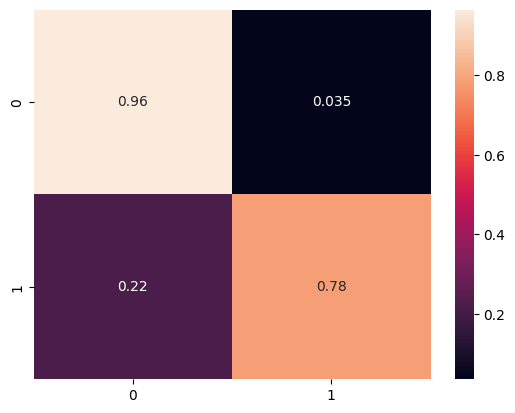

In [130]:
y_pred = model.predict(X_train)
cmat = metrics.confusion_matrix(y_train, y_pred.round())
cmn = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True)

In [135]:
#Conv1D Model
modelConv1D = tf.keras.Sequential()
modelConv1D.add(Embedding(vocab_size,output_dim=EMBEDDING_DIM))
modelConv1D.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
modelConv1D.add(GlobalMaxPooling1D())
modelConv1D.add(Dense(128, activation='relu'))
modelConv1D.add(Dense(1, activation='sigmoid'))
modelConv1D.compile(loss='binary_crossentropy', optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001), metrics=['accuracy'])
model_name = 'Conv1DModel.h5'
callbacks = list()
callbacks.append(EarlyStopping(monitor='val_loss', min_delta=0, mode='auto', patience=2))
callbacks.append(ModelCheckpoint(model_name, monitor='val_acc', save_weights_only=False, save_best_only=True, mode='max'))

In [136]:
modelConv1D.fit(X_train,y_train,epochs=100,verbose=1,batch_size=64,validation_split=0.3,shuffle=False,callbacks=callbacks,)

Epoch 1/100
84/84 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5226

84/84 [==============================] - 19s 212ms/step - loss: 0.6913 - accuracy: 0.5226 - val_loss: 0.6875 - val_accuracy: 0.5582
Epoch 2/100
84/84 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.5755

84/84 [==============================] - 16s 196ms/step - loss: 0.6809 - accuracy: 0.5755 - val_loss: 0.6828 - val_accuracy: 0.5582
Epoch 3/100
84/84 [==============================] - ETA: 0s - loss: 0.6701 - accuracy: 0.5797

84/84 [==============================] - 16s 193ms/step - loss: 0.6701 - accuracy: 0.5797 - val_loss: 0.6768 - val_accuracy: 0.5582
Epoch 4/100
84/84 [==============================] - ETA: 0s - loss: 0.6558 - accuracy: 0.5859

84/84 [==============================] - 18s 221ms/step - loss: 0.6558 - accuracy: 0.5859 - val_loss: 0.6686 - val_accuracy: 0.5582
Epoch 5/100
84/84 [==============================] - ETA: 0s - loss: 0.6358 - accuracy: 0.6472

84/84 [==============================] - 17s 199ms/step - loss: 0.6358 - accuracy: 0.6472 - val_loss: 0.6566 - val_accuracy: 0.5884
Epoch 6/100
84/84 [==============================] - ETA: 0s - loss: 0.6052 - accuracy: 0.7714

84/84 [==============================] - 18s 209ms/step - loss: 0.6052 - accuracy: 0.7714 - val_loss: 0.6379 - val_accuracy: 0.7145
Epoch 7/100
84/84 [==============================] - ETA: 0s - loss: 0.5617 - accuracy: 0.8519

84/84 [==============================] - 18s 217ms/step - loss: 0.5617 - accuracy: 0.8519 - val_loss: 0.6150 - val_accuracy: 0.7342
Epoch 8/100
84/84 [==============================] - ETA: 0s - loss: 0.5078 - accuracy: 0.8820

84/84 [==============================] - 17s 200ms/step - loss: 0.5078 - accuracy: 0.8820 - val_loss: 0.5916 - val_accuracy: 0.7325
Epoch 9/100
84/84 [==============================] - ETA: 0s - loss: 0.4451 - accuracy: 0.8989

84/84 [==============================] - 17s 201ms/step - loss: 0.4451 - accuracy: 0.8989 - val_loss: 0.5678 - val_accuracy: 0.7272
Epoch 10/100
84/84 [==============================] - ETA: 0s - loss: 0.3771 - accuracy: 0.9156

84/84 [==============================] - 18s 213ms/step - loss: 0.3771 - accuracy: 0.9156 - val_loss: 0.5467 - val_accuracy: 0.7299
Epoch 11/100
84/84 [==============================] - ETA: 0s - loss: 0.3111 - accuracy: 0.9300

84/84 [==============================] - 17s 200ms/step - loss: 0.3111 - accuracy: 0.9300 - val_loss: 0.5292 - val_accuracy: 0.7404
Epoch 12/100
84/84 [==============================] - ETA: 0s - loss: 0.2510 - accuracy: 0.9456

84/84 [==============================] - 17s 201ms/step - loss: 0.2510 - accuracy: 0.9456 - val_loss: 0.5163 - val_accuracy: 0.7447
Epoch 13/100
84/84 [==============================] - ETA: 0s - loss: 0.1997 - accuracy: 0.9597

84/84 [==============================] - 19s 225ms/step - loss: 0.1997 - accuracy: 0.9597 - val_loss: 0.5078 - val_accuracy: 0.7461
Epoch 14/100
84/84 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 0.9705

84/84 [==============================] - 17s 200ms/step - loss: 0.1575 - accuracy: 0.9705 - val_loss: 0.5032 - val_accuracy: 0.7452
Epoch 15/100
84/84 [==============================] - ETA: 0s - loss: 0.1235 - accuracy: 0.9777

84/84 [==============================] - 17s 198ms/step - loss: 0.1235 - accuracy: 0.9777 - val_loss: 0.5019 - val_accuracy: 0.7439
Epoch 16/100
84/84 [==============================] - ETA: 0s - loss: 0.0967 - accuracy: 0.9829

84/84 [==============================] - 18s 209ms/step - loss: 0.0967 - accuracy: 0.9829 - val_loss: 0.5033 - val_accuracy: 0.7452
Epoch 17/100
84/84 [==============================] - ETA: 0s - loss: 0.0761 - accuracy: 0.9882

84/84 [==============================] - 17s 201ms/step - loss: 0.0761 - accuracy: 0.9882 - val_loss: 0.5065 - val_accuracy: 0.7412


238/238 [==============================] - 8s 32ms/step


<Axes: >

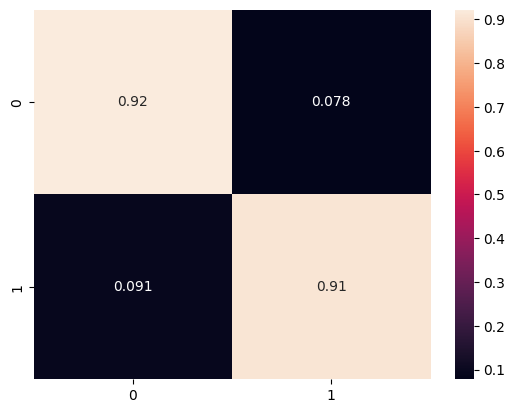

In [137]:
Y_pred = modelConv1D.predict(X_train)
cmat = metrics.confusion_matrix(y_train, Y_pred.round())
cmn = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True)